In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Image

from sklearn.model_selection import train_test_split

from sklift.metrics import uplift_at_k
from sklift.viz import plot_uplift_preds
from sklift.models import SoloModel, ClassTransformation, TwoModels

# from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
# from causalml.inference.tree import uplift_tree_string, uplift_tree_plot

from catboost import CatBoostClassifier


In [57]:
df = pd.read_csv('data.csv', delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        64000 non-null  int64  
 1   history        64000 non-null  float64
 2   used_discount  64000 non-null  int64  
 3   used_bogo      64000 non-null  int64  
 4   zip_code       64000 non-null  object 
 5   is_referral    64000 non-null  int64  
 6   channel        64000 non-null  object 
 7   offer          64000 non-null  object 
 8   conversion     64000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


In [58]:
df.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


In [4]:
df['conversion'].value_counts()

0    54606
1     9394
Name: conversion, dtype: int64

AxesSubplot(0.125,0.11;0.775x0.77)


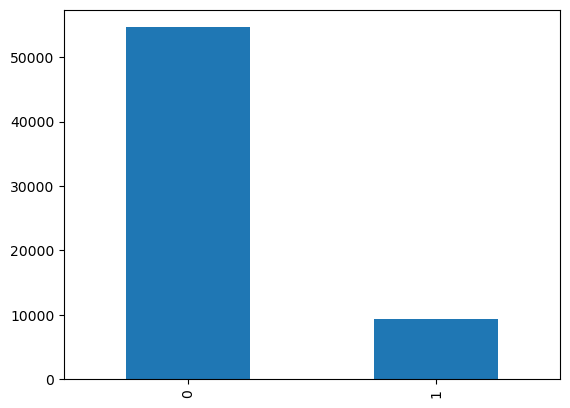

In [5]:
print(df['conversion'].value_counts().plot(kind='bar'))

In [6]:
df['offer'].value_counts()

Buy One Get One    21387
Discount           21307
No Offer           21306
Name: offer, dtype: int64

In [7]:
df = df.rename(columns={'conversion': 'target', 'offer': 'treatment'})

In [8]:
df.describe()

,recency,history,used_discount,used_bogo,is_referral,target
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781
std,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,treatment,target
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


In [10]:
df.loc[df['treatment'] != 'No Offer', 'treatment'] = 1
df.loc[df['treatment'] == 'No Offer', 'treatment'] = 0
df['treatment'] = df['treatment'].astype(np.uint8)

In [11]:
df['treatment']

0        1
1        0
2        1
3        1
4        1
        ..
63995    1
63996    1
63997    1
63998    1
63999    1
Name: treatment, Length: 64000, dtype: uint8

In [12]:
df['treatment'].value_counts()

1    42694
0    21306
Name: treatment, dtype: int64

In [13]:
df.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,treatment,target
0,10,142.44,1,0,Surburban,0,Phone,1,0
1,6,329.08,1,1,Rural,1,Web,0,0
2,7,180.65,0,1,Surburban,1,Web,1,0
3,9,675.83,1,0,Rural,1,Web,1,0
4,2,45.34,1,0,Urban,0,Web,1,0


In [14]:
X_train, X_test, y_train, y_test, treat_train, treat_test = train_test_split(df.drop(columns=['target']), 
                                                            df['target'],
                                                            df['treatment'],
                                                            random_state=0)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, treat_train.shape

((48000, 8), (16000, 8), (48000,), (16000,), (48000,))

In [16]:
df.columns

Index(['recency', 'history', 'used_discount', 'used_bogo', 'zip_code',
       'is_referral', 'channel', 'treatment', 'target'],
      dtype='object')

In [17]:
features = ['recency', 'history', 'used_discount', 'used_bogo',
       'is_referral', 'treatment']

In [18]:
cat_features = ['zip_code', 'channel']


In [19]:
target = ['target']

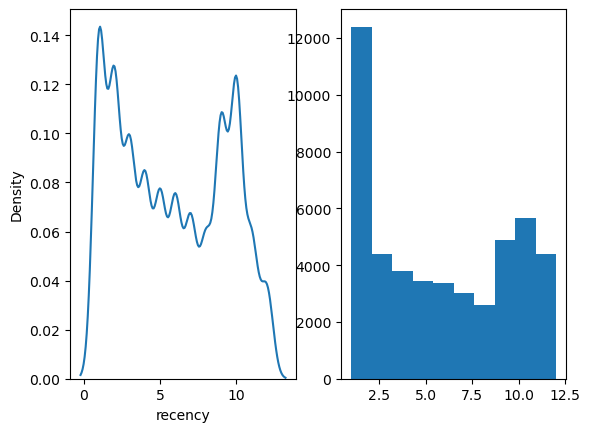

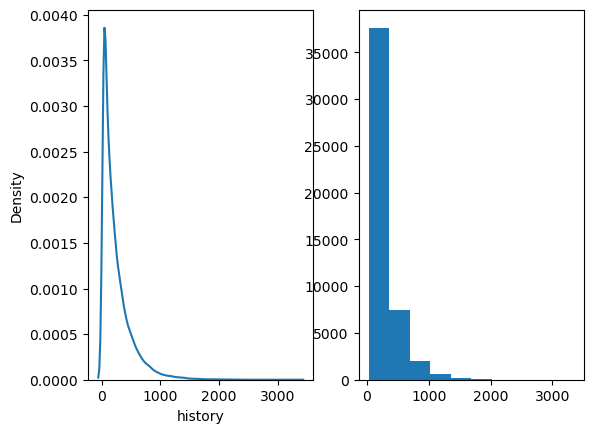

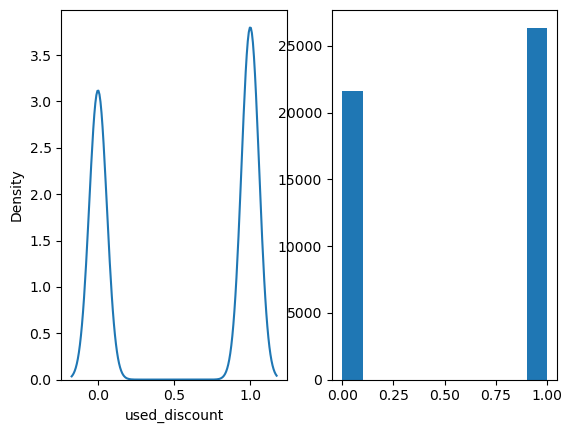

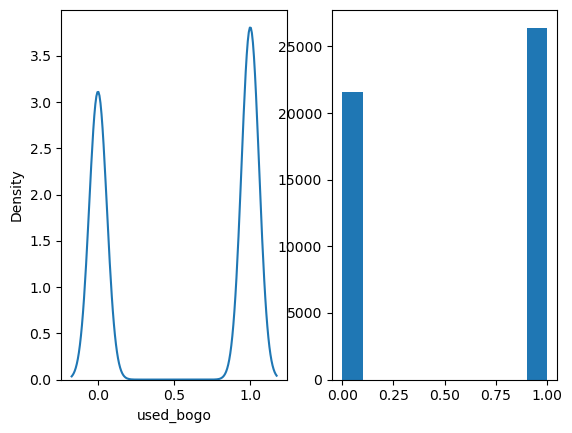

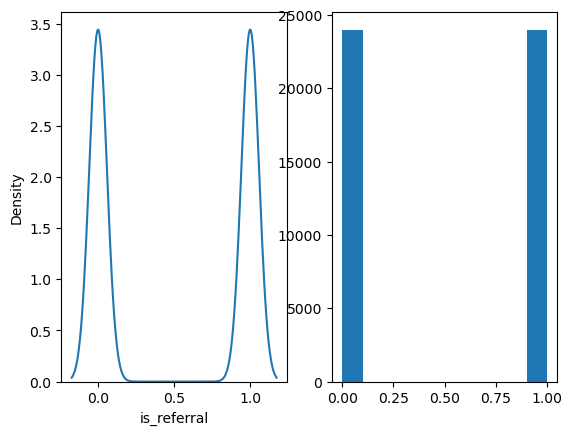

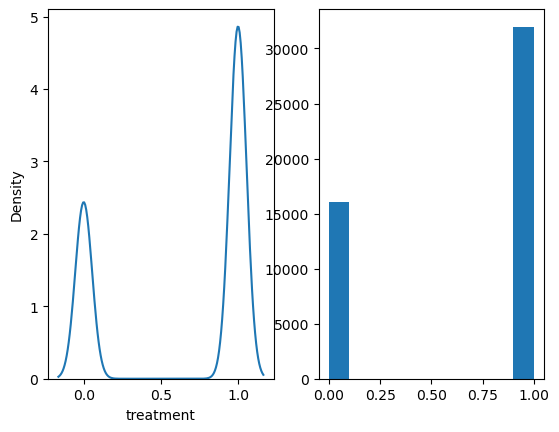

In [20]:
for name in features:
    plt.subplot(1,2,1)
    sns.kdeplot(X_train[name])
    plt.subplot(1,2,2)
    plt.hist(X_train[name])
    plt.show()
    

In [21]:
# from sklearn.preprocessing import KBinsDiscretizer

In [22]:
# x_new = KBinsDiscretizer(n_bins = 5, encode = 'ordinal').fit_transform(X_train['recency'].values.reshape(-1,1))
# plt.subplot(1,2,1)
# plt.hist(X_train['recency'])
# plt.subplot(1,2,2)
# plt.hist(x_new, bins=5)
# plt.show()

In [23]:
# X_train['recency'].quantile([0.25, 0.5, 0.75])

In [24]:
# d4 = pd.qcut(X_train['recency'], 4, labels= False)
# plt.subplot(1,2,1)
# plt.hist(X_train['recency'])
# plt.subplot(1,2,2)
# plt.hist(d4, bins=4)
# plt.show()

In [25]:
# from sklearn.preprocessing import QuantileTransformer

# qt = QuantileTransformer(output_distribution='normal')

In [26]:
# dq = qt.fit_transform(X_train['recency'].values.reshape(-1,1))
# plt.subplot(1,2,1)
# plt.hist(X_train['recency'])
# plt.subplot(1,2,2)
# plt.hist(dq)
# plt.show()


In [27]:
# plt.subplot(1,2,1)
# sns.kdeplot(np.log(X_train['history'].values+1))
# plt.xlabel('log(x)')
# plt.subplot(1,2,2)
# sns.kdeplot((X_train['history'].values+1))

# plt.xlabel('x')
# plt.show()

In [28]:
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures

In [29]:
pT = PowerTransformer(method = 'yeo-johnson')

In [30]:
x_new = pT.fit_transform(X_train.loc[:, ['recency', 'history']]+1)
x_new

array([[ 0.69820889, -0.82195783],
       [-0.72045023,  0.95854061],
       [-0.38973589,  2.12202551],
       ...,
       [ 1.56695909,  1.01623506],
       [-1.51275506,  0.78683318],
       [-1.08941347,  0.39144104]])

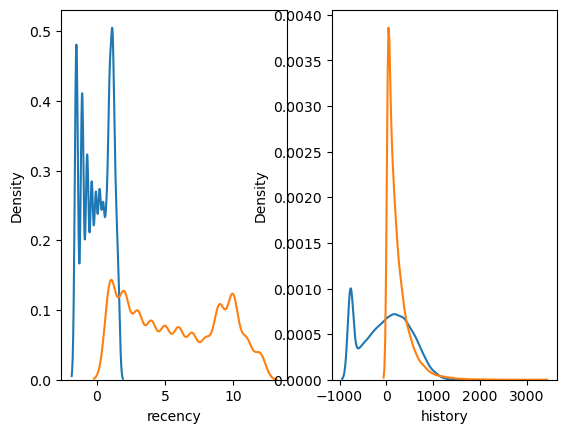

In [31]:
plt.subplot(1,2,1)
sns.kdeplot(x_new[:,0])
sns.kdeplot(X_train['recency'].values)
plt.xlabel('recency')
plt.subplot(1,2,2)
sns.kdeplot(x_new[:, 1]*500)
sns.kdeplot(X_train['history'].values)

plt.xlabel('history')
plt.show()

In [32]:
cat_features

['zip_code', 'channel']

In [33]:
df.zip_code.value_counts()

Surburban    28776
Urban        25661
Rural         9563
Name: zip_code, dtype: int64

In [34]:
df.channel.value_counts()

Web             28217
Phone           28021
Multichannel     7762
Name: channel, dtype: int64

In [35]:
# df1 = pd.get_dummies(df['zip_code'])
# df = pd.concat([df, df1], axis=1).reindex(df.index)
# df.drop('zip_code', axis=1, inplace=True)
# df

In [36]:
# df2 = pd.get_dummies(df['channel'])
# df = pd.concat([df, df2], axis=1).reindex(df.index)
# df.drop('channel', axis=1, inplace=True)
# df

In [37]:
metrics_df = pd.DataFrame(columns=['uplift@10%', 'uplift@20%'])

In [38]:
sm = SoloModel(CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
sm = sm.fit(X_train, y_train, treat_train, estimator_fit_params={'cat_features': cat_features})


In [39]:
uplift_sm = sm.predict(X_test)
print(uplift_sm)

sm_score_10 = uplift_at_k(y_true=y_test, uplift=uplift_sm, treatment=treat_test, strategy='by_group', k=0.1)
sm_score_20 = uplift_at_k(y_true=y_test, uplift=uplift_sm, treatment=treat_test, strategy='by_group', k=0.2)

[0.08557733 0.07419337 0.08570074 ... 0.09613985 0.0500112  0.10886715]


In [40]:
metrics_df = metrics_df.append({'uplift@10%': sm_score_10, 'uplift@20%': sm_score_20}, ignore_index=True)
metrics_df

/var/folders/g_/9v3q8zfn4dj84j48wgjpsd7c0000gn/T/ipykernel_26541/1725228205.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'uplift@10%': sm_score_10, 'uplift@20%': sm_score_20}, ignore_index=True)


,uplift@10%,uplift@20%
0,0.066734,0.058553


In [41]:
ct = ClassTransformation(CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
ct = ct.fit(X_train, y_train, treat_train, estimator_fit_params={'cat_features': cat_features})

uplift_ct = ct.predict(X_test)
print(uplift_ct)

ct_score_10 = uplift_at_k(y_true=y_test, uplift=uplift_ct, treatment=treat_test, strategy='by_group', k=0.1)
ct_score_20 = uplift_at_k(y_true=y_test, uplift=uplift_ct, treatment=treat_test, strategy='by_group', k=0.2)

[-0.65130053 -0.65668588 -0.52379824 ...  0.73403501 -0.6053989
 -0.36820204]


In [42]:
metrics_df = metrics_df.append({'uplift@10%': ct_score_10, 'uplift@20%': ct_score_20}, ignore_index=True)
metrics_df

/var/folders/g_/9v3q8zfn4dj84j48wgjpsd7c0000gn/T/ipykernel_26541/2688233470.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'uplift@10%': ct_score_10, 'uplift@20%': ct_score_20}, ignore_index=True)


,uplift@10%,uplift@20%
0,0.066734,0.058553
1,0.208646,0.184652


In [43]:
tm = TwoModels(
    estimator_trmnt=CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True), 
    estimator_ctrl=CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True), 
    method='vanilla')

In [44]:
tm = tm.fit(
    X_train, y_train, treat_train,
    estimator_trmnt_fit_params={'cat_features': cat_features}, 
    estimator_ctrl_fit_params={'cat_features': cat_features})

uplift_tm = tm.predict(X_test)
print(uplift_tm)

tm_score_10 = uplift_at_k(y_true=y_test, uplift=uplift_tm, treatment=treat_test, strategy='by_group', k=0.1)
tm_score_20 = uplift_at_k(y_true=y_test, uplift=uplift_tm, treatment=treat_test, strategy='by_group', k=0.2)

[0.10131404 0.06242448 0.08409682 ... 0.08187262 0.05867446 0.01930044]


In [45]:
metrics_df = metrics_df.append({'uplift@10%': tm_score_10, 'uplift@20%': tm_score_20}, ignore_index=True)
metrics_df

/var/folders/g_/9v3q8zfn4dj84j48wgjpsd7c0000gn/T/ipykernel_26541/2724312577.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'uplift@10%': tm_score_10, 'uplift@20%': tm_score_20}, ignore_index=True)


,uplift@10%,uplift@20%
0,0.066734,0.058553
1,0.208646,0.184652
2,0.066734,0.073705


In [3]:


from causalml.inference.tree import UpliftTreeClassifier , UpliftRandomForestClassifier
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot
from sklearn import tree

ModuleNotFoundError: No module named 'causalml'

In [52]:
def transform_data_to_tree(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df = pd.get_dummies(df, drop_first=True)
    return df

In [53]:
X_train_tree = transform_data_to_tree(X_train)
X_test_tree = transform_data_to_tree(X_test)
features = [col for col in X_train_tree]

In [55]:
uplift_model = UpliftTreeClassifier(max_depth=8, min_samples_leaf=200, min_samples_treatment=50,
                                    n_reg=100, evaluationFunction='KL', control_name='control')

uplift_model.fit(X_train_tree.values,
                 treatment=treat_train.map({1: 'treatment1', 0: 'control'}).values,
                 y=y_train)

graph = uplift_tree_plot(uplift_model.fitted_uplift_tree, features)
Image(graph.create_png())

NameError: name 'UpliftTreeClassifier' is not defined